In [3]:
import numpy as np

In [4]:
from sklearn.datasets import fetch_mldata

In [5]:
mnist = fetch_mldata("MNIST original",data_home='/Users/chao/scikit_learn_data/')

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
X, y = mnist['data'],mnist['target']

In [8]:
X_train = np.array(X[:60000],dtype=float)
X_test = np.array(X[60000:],dtype=float)
y_train  =np.array(y[:60000],dtype=float)
y_test = np.array(y[60000:],dtype=float)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
#time knn_clf.fit(X_train,y_train)

In [ ]:
knn_clf.score(X_test,y_test)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(0.9)

In [11]:
pca.fit(X_train)
X_train_reduction= pca.transform(X_train)

In [13]:
X_test_reduction = pca.transform(X_test)

In [14]:
%%time
knn_clf.fit(X_train_reduction,y_train)

CPU times: user 377 ms, sys: 11.1 ms, total: 388 ms
Wall time: 423 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
%%time
knn_clf.score(X_test_reduction,y_test)

CPU times: user 1min 19s, sys: 860 ms, total: 1min 20s
Wall time: 1min 27s


0.9728

## Eigenface

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import fetch_lfw_people

In [5]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [6]:
faces.images.shape

(1348, 62, 47)

In [7]:
X = faces.data
y = faces.target

In [8]:
n = 36
random_inx = np.random.permutation(36)

In [68]:
X.shape

(1348, 2914)

In [9]:
X = faces.data[random_inx]
y = faces.target[random_inx]

In [10]:
def plot_faces(data,cmap = 'binary_r'):
    fig,axes = plt.subplots(6,6,figsize =(10,10),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(62,-1),cmap=cmap)
        
    plt.show()

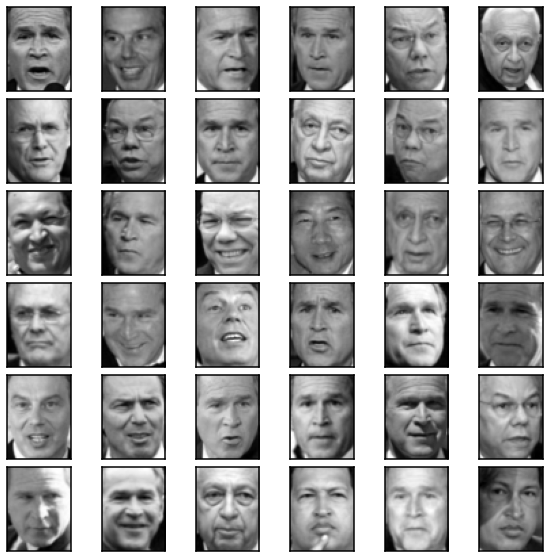

In [11]:
plot_faces(X)

In [64]:
faces.target_names[y]

array(['Donald Rumsfeld', 'Donald Rumsfeld', 'Junichiro Koizumi',
       'Colin Powell', 'Ariel Sharon', 'George W Bush', 'Colin Powell',
       'Colin Powell', 'George W Bush', 'Ariel Sharon', 'George W Bush',
       'Colin Powell', 'Tony Blair', 'George W Bush', 'George W Bush',
       'George W Bush', 'Colin Powell', 'Tony Blair', 'Ariel Sharon',
       'George W Bush', 'George W Bush', 'George W Bush', 'Hugo Chavez',
       'Donald Rumsfeld', 'Tony Blair', 'George W Bush', 'George W Bush',
       'Hugo Chavez', 'Ariel Sharon', 'George W Bush', 'George W Bush',
       'George W Bush', 'Hugo Chavez', 'George W Bush', 'George W Bush',
       'Tony Blair'], dtype='<U17')

## Eignen Face

In [16]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.components_.shape

(24, 2914)

IndexError: index 24 is out of bounds for axis 0 with size 24

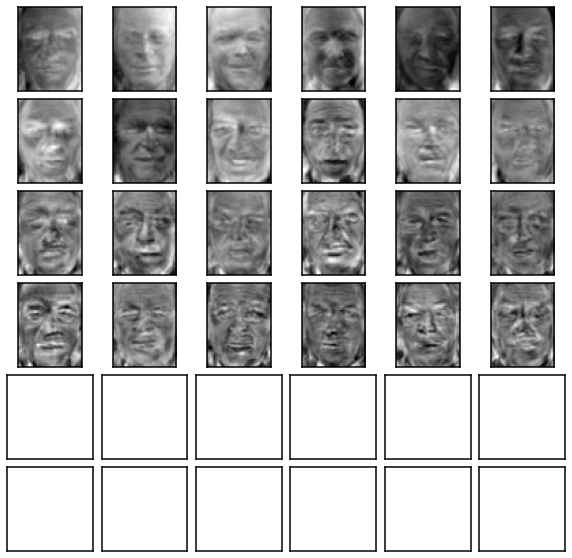

In [18]:
plot_faces(pca.components_[:36])